# Latar Belakang

## Pernyataan Masalah

Perusahaan ingin mengetahui lebih lanjut mengenai preference dari beberapa customers. Perusahaan juga ingin melihat faktor-faktor apa saja (campaign, tempat jual, produk itu sendiri) yang dapat dihubungkan dengan pattern penjualan produk secara menyeluruh atau produk tertentu. Informasi ini akan membantu perusahaan untuk mempertahankan customer loyalty karena dapat memutuskan strategi yang tepat untuk perusahaan pada tiap segmen customer. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana hubungan karakteristik customer ataupun strategi perusahaan saat ini dapat di maksimalkan dengan penjualan seluruh produk dari supermarket?**

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait karakteristik customer seperti tahun lahir, household, income, dan sebagai nya. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:  

People:

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion:

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place:

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

* Z_CostContact
* Z_Revenue

Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [99]:
df = pd.read_excel('Supermarket Customers.xlsx')
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


# Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [100]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [101]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [102]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 29 kolom dan 22.240 baris

### Missing Value

In [103]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [104]:
df[df["Income"].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Kita dapat melihat pada dataset, ada 24 missing values dan semua berada pada kolom "Income". Data yang hilang dapat dilihat di atas. 

Sebagai Data Analyst, kita harus menentukan angka berapa untuk mengisi beberapa missing income. Melihat dari dataset, hal yang paling logical untuk mengisi missing values adalah dengan melihat edukasi dari tiap customers. Pada umumnya, edukasi seseorang dapat menentukan besarnya income orang tersebut. Sehingga, kita dapat memasukkan missing values dengan angka median income dari tiap education customer. 

In [105]:
income_graduation = df.loc[df['Education'] == 'Graduation', ['Income']].median()
income_graduation[0]

52028.5

In [106]:
df_graduation = df[(df['Education'] == 'Graduation') & (df['Income'].isna())].fillna(income_graduation[0])


In [107]:
phd_graduation = df.loc[df['Education'] == 'PhD', ['Income']].median()
phd_graduation[0]

55212.0

In [108]:
df_phd = df[(df['Education'] == 'PhD') & (df['Income'].isna())].fillna(phd_graduation[0])


In [109]:
nCycle_graduation = df.loc[df['Education'] == '2n Cycle', ['Income']].median()
nCycle_graduation[0]

46805.0

In [110]:
df_2ncycle = df[(df['Education'] == '2n Cycle') & (df['Income'].isna())].fillna(nCycle_graduation[0])

In [111]:
master_graduation = df.loc[df['Education'] == 'Master', ['Income']].median()
master_graduation[0]

50943.0

In [112]:
df_master = df[(df['Education'] == 'Master') & (df['Income'].isna())].fillna(master_graduation[0])


In [113]:
df[df["Income"].isna()] = pd.concat([df_graduation, df_phd, df_2ncycle, df_master]).sort_values(by='Education')


Memastikan apakah angka sudah masuk pada dataset

In [114]:
df[(df['Education'] == 'Graduation') & (df['Income']== 52028.5)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,52028.5,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,52028.5,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,52028.5,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,52028.5,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,52028.5,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
133,1295,1963,Graduation,Married,52028.5,0,1,11-08-2013,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0
312,2437,1989,Graduation,Married,52028.5,0,0,03-06-2013,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0
319,2863,1970,Graduation,Single,52028.5,1,2,23-08-2013,67,738,20,172,52,50,20,6,2,3,10,7,0,1,0,1,0,0,3,11,0
1382,2902,1958,Graduation,Together,52028.5,1,1,03-09-2012,87,19,4,12,2,2,6,1,1,0,3,5,0,0,0,0,0,0,3,11,0
2078,5079,1971,Graduation,Married,52028.5,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0


In [115]:
df.iloc[[10]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,52028.5,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0


### Outlier

Saat ini kita ingin melihat distribusi data dari income customers 

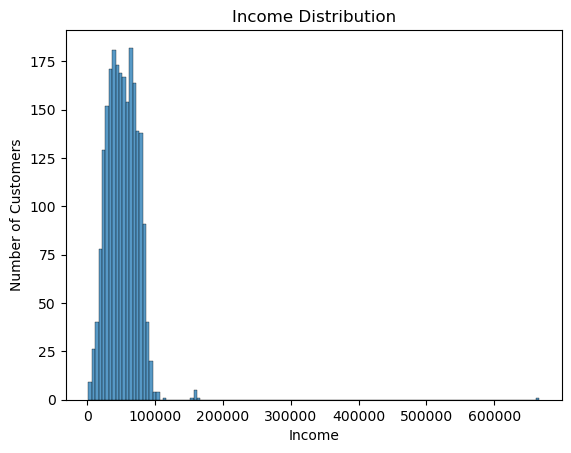

In [116]:
sns.histplot(data=df, x='Income')

plt.ylabel('Number of Customers')
plt.title('Income Distribution');

In [117]:
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Terlihat ada 1 outlier yang jumlah income-nya sangat jauh dari customers lainnya. Hal ini mungkin dapat benar terjadi atau juga sebuah kesalahan dalam pengumpulan data, namun untuk memudahkan analisa, kami akan menghilangkan outlier tersebut dari dataset dikarenakan dapat mengubah outcome yang terlalu signifikan ketika sedang melakukan analisa. 

Perusahaan harus memastikan ulang terlebih dahulu mengenai customer tersebut. Jika angka income sudah benar, perusahaan dapat memaksimalkan outlier ini dengan mencoba melakukan direct selling barang-barang mewah yang dimiliki supermarket.

In [118]:
df = df.drop(2233)

In [119]:
df = df.reset_index()
df = df.drop(columns=['index'])

In [120]:
df.iloc[[2233]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0


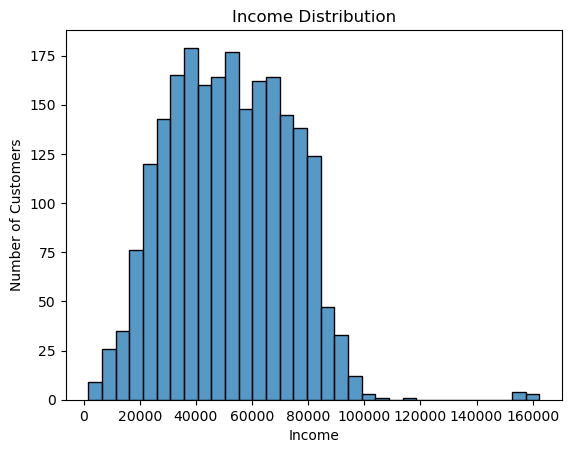

In [121]:
sns.histplot(data=df, x='Income')

plt.ylabel('Number of Customers')
plt.title('Income Distribution');


Kita juga menemukan pada info yang sudah diambil, bahwa kolom Dt_Customer bukan dalam bentuk datetime. Sebagai data analyst, harus di ubah terlebih dahulu agar data dapat diolah secara benar.

In [122]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Pada dataset, terdapat angka tahun lahir dari customer. Agar memudahkan untuk melihat umur tiap customer, kita sebaiknya menambahkan kolom umur terlebih dahulu. (Asumsi data di olah pada tahun 2015)

In [123]:
df['Age'] = 2015 - df['Year_Birth'].apply(lambda x:int(x))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48
2235,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69
2236,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34
2237,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59


Dataset juga memiliki pembelian per customer tiap kategori produk. Namun, dataset tidak memiliki jumlah pembelian per customer di supermarket. Sehingga, sebaiknya kami tambahkan terlebih dahulu.

In [124]:
df['ProductsBought'] = df['MntWines'].apply(lambda x:int(x)) + df['MntFruits'].apply(lambda x:int(x)) + df['MntMeatProducts'].apply(lambda x:int(x)) + df['MntFishProducts'].apply(lambda x:int(x)) + df['MntSweetProducts'].apply(lambda x:int(x)) + df['MntGoldProds'].apply(lambda x:int(x))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48,1341
2235,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69,444
2236,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34,1241
2237,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59,843


Dataset juga memiliki tanggal enrollment customer. Namun, untuk mempermudah analisa, kita akan menambahkan kolom baru yaitu bulan enrollment customer terlebih dahulu.

In [125]:
df['EnrollMonth'] = df['Dt_Customer'].apply(lambda x:str(x)[0:7])
df['EnrollMonth'] = pd.to_datetime(df['EnrollMonth'].astype(str))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,2012-04-01
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,2014-08-01
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50,776,2013-08-01
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31,53,2014-10-01
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48,1341,2013-06-01
2235,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69,444,2014-10-01
2236,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34,1241,2014-01-01
2237,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59,843,2014-01-01


# Data Visualization and Analysis

## Correlation between Variables

Pada Bagian ini, kita ingin melihat hubungan antara kolom atau variabel. Kita melihat hubungan dari variabel untuk menentukan apa saja variabel yang dapat kami teliti dan memiliki efek untuk perusahaan membuat strategi agar memaksimalkan penjualan produk.

In [126]:
df.corr(method='spearman')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought
ID,1.000000,0.002109,0.003152,0.000092,-0.002478,-0.045546,-0.025056,-0.022431,-0.012782,-0.029013,-0.033764,-0.041327,-0.024779,-0.024574,-0.012156,-0.022665,-0.011420,-0.035781,-0.025081,-0.007149,-0.021614,-0.015987,0.034288,NaN,NaN,-0.022022,-0.002109,-0.024720
Year_Birth,0.002109,1.000000,-0.216911,0.259069,-0.385222,-0.020327,-0.233803,-0.025564,-0.112234,-0.030527,0.003461,-0.076381,-0.087245,-0.164331,-0.178633,-0.167328,0.131050,0.064213,-0.066631,0.014954,-0.006109,-0.013422,-0.008602,NaN,NaN,0.020883,-1.000000,-0.156468
Income,0.003152,-0.216911,1.000000,-0.558345,0.046988,0.008584,0.829157,0.579094,0.813958,0.574770,0.565162,0.504241,-0.194368,0.571767,0.789221,0.730323,-0.640416,-0.014946,0.221694,0.393966,0.328063,0.105089,-0.030898,NaN,NaN,0.160378,0.216911,0.848534
Kidhome,0.000092,0.259069,-0.558345,1.000000,-0.045897,0.006745,-0.580089,-0.450161,-0.550467,-0.452758,-0.438516,-0.426231,0.260129,-0.421831,-0.597482,-0.556362,0.481701,0.020465,-0.164157,-0.210868,-0.180126,-0.083669,0.039769,NaN,NaN,-0.077278,-0.259069,-0.614826
Teenhome,-0.002478,-0.385222,0.046988,-0.045897,1.000000,0.009491,0.110838,-0.201077,-0.127986,-0.229657,-0.198430,-0.022996,0.481762,0.146069,-0.044020,0.077026,0.111791,-0.045446,0.037320,-0.200085,-0.145315,-0.017643,0.000943,NaN,NaN,-0.159526,0.385222,-0.057052
Recency,-0.045546,-0.020327,0.008584,0.006745,0.009491,1.000000,0.018142,0.025442,0.027514,0.013207,0.023827,0.018119,0.008248,-0.004055,0.030515,0.005131,-0.021825,-0.032830,0.018706,0.000523,-0.019350,-0.001950,0.013231,NaN,NaN,-0.198358,0.020327,0.019550
MntWines,-0.025056,-0.233803,0.829157,-0.580089,0.110838,0.018142,1.000000,0.517886,0.823589,0.524688,0.505221,0.575243,0.057816,0.740286,0.823507,0.806803,-0.389082,0.034589,0.310674,0.365795,0.304067,0.138204,-0.038114,NaN,NaN,0.198912,0.233803,0.927024
MntFruits,-0.022431,-0.025564,0.579094,-0.450161,-0.201077,0.025442,0.517886,1.000000,0.713340,0.705022,0.691666,0.568844,-0.110003,0.471318,0.634791,0.583558,-0.442853,0.009228,0.030445,0.237010,0.177786,0.002771,-0.012040,NaN,NaN,0.148969,0.025564,0.682610
MntMeatProducts,-0.012782,-0.112234,0.813958,-0.550467,-0.127986,0.027514,0.823589,0.713340,1.000000,0.726275,0.695719,0.637759,-0.031978,0.679084,0.851651,0.779196,-0.492416,0.008789,0.142932,0.331483,0.284993,0.062877,-0.025053,NaN,NaN,0.223104,0.112234,0.939364
MntFishProducts,-0.029013,-0.030527,0.574770,-0.452758,-0.229657,0.013207,0.524688,0.705022,0.726275,1.000000,0.700979,0.565239,-0.119746,0.466326,0.657101,0.582692,-0.458389,-0.024264,0.006613,0.218435,0.211012,-0.000407,-0.028670,NaN,NaN,0.115394,0.030527,0.695662


In [127]:
df_noZ = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

<AxesSubplot:>

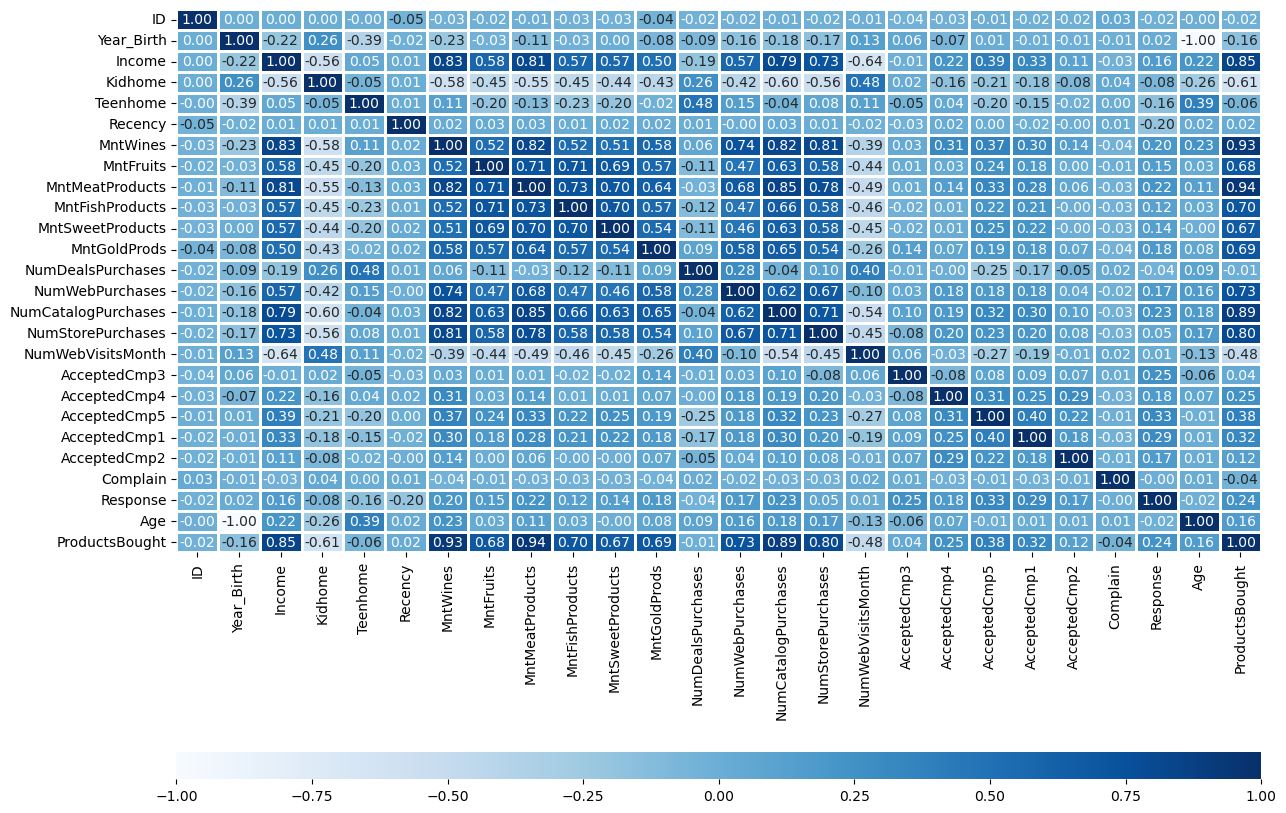

In [195]:
grid_kw = {
    'height_ratios': (20,1),        # perbandingan tinggi subplot
    'hspace': 0.7                   # jarak antar subplot
}
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw=grid_kw)
sns.heatmap(
    data= df_noZ.corr(method='spearman'),
    ax= ax_top,                                 # axis dari heatmap
    cbar_ax= ax_bottom,                         # axis dari color bar
    cbar_kws= {'orientation':'horizontal'},     # customize color bar
    annot= True,                                # menampilkan label/anotasi
    fmt= '.2f',                                 # format anotasi 2 digit decimal
    cmap= 'Blues',                             # palette warna
    linewidths= 2                               # border antar cell
)

* Semakin biru, semakin berkoleasi positif. 
* Semakin hijau, semakin tidak ada korelasi.
* Semakin kuning, semakin berkorelasi negatif.

Terlihat pada grafik di atas, bahwa ada beberapa variabel yang berhubungan signifikan secara positif (0.8 - 1.00) dan sedikit yang berhubungan signifikan negatif (-0.8 - -1.00). Variabel yang tidak berkorelasi tidak akan terlalu dibahas. 

Terlihat bahwa hubungan antar produk ataupun hubungan antara produk dan tempat pembelian banyak yang berkorelasi positif. Namun, korelasi ini tidak akan terlalu di fokuskan. Namun, hubungan tersebut menggambarkan bahwa customer cenderung melakukan pembelian dengan membeli beragam produk, tidak hanya satu. Banyak nya produk dibeli pun pastinya akan menambah penjualan di tempat pembelian customer.

Dari grafik di atas. Korelasi yang di analisa lebih lanjut adalah hubungan Income dengan banyak nya produk yang dibeli dan juga hubungannya dengan produk-produk seperti Meat dan Wines.

<AxesSubplot:xlabel='ProductsBought', ylabel='Count'>

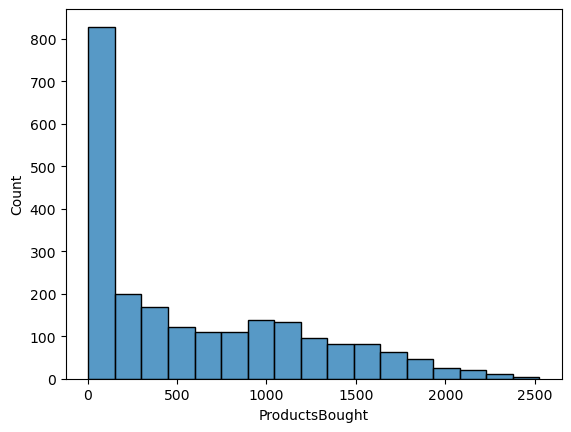

In [129]:
sns.histplot(data=df, x='ProductsBought')

<AxesSubplot:xlabel='MntWines', ylabel='Count'>

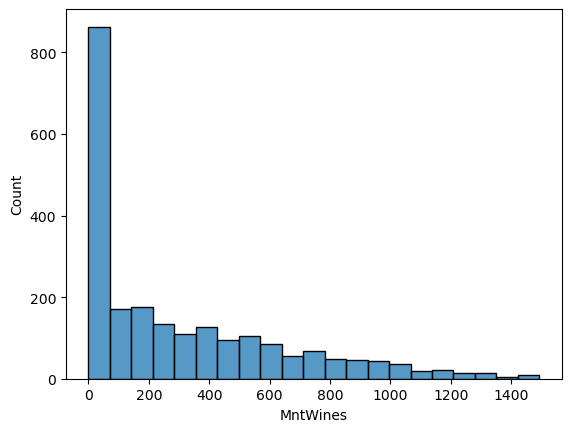

In [130]:
sns.histplot(data=df, x='MntWines')

<AxesSubplot:xlabel='MntMeatProducts', ylabel='Count'>

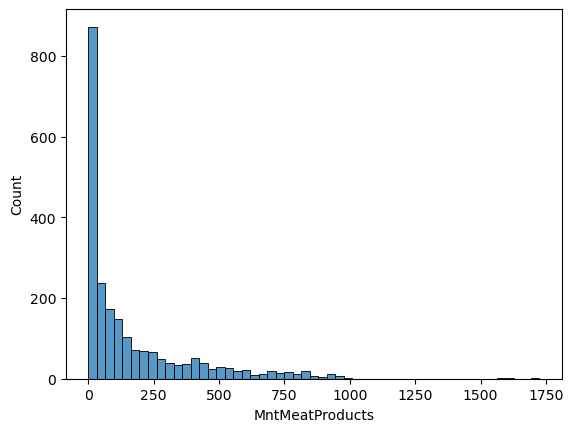

In [131]:
sns.histplot(data=df, x='MntMeatProducts')

Terlihat juga pada grafik diatas distribusi dari 3 variabel ProductsBought, Meat, dan Wines adalah 'Right Skewed' sehingga menggunakan korelasi spearman adalah metode yang benar.

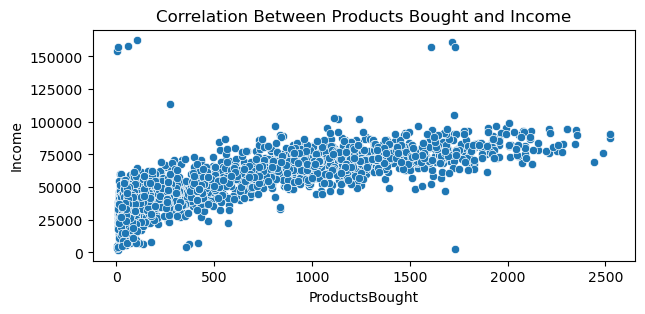

In [132]:
plt.figure(figsize=(7,3))
sns.scatterplot(data = df, x= 'ProductsBought', y = 'Income')
plt.title('Correlation Between Products Bought and Income')
plt.show()

In [133]:
df.corr(method='spearman').loc['Income', 'ProductsBought']

0.8485336637941904

Income dan Products Bought memiliki positive correlation yang kuat sebesar 0.85. Ini menggambarkan bahwa besar nya income yang dimiliki customer, dapat mempengaruhi banyak nya produk yang di beli oleh customer. Hal ini dapat menggambarkan strategi perusahaan untuk melakukan approach ke customer berdasarkan income customer tersebut.

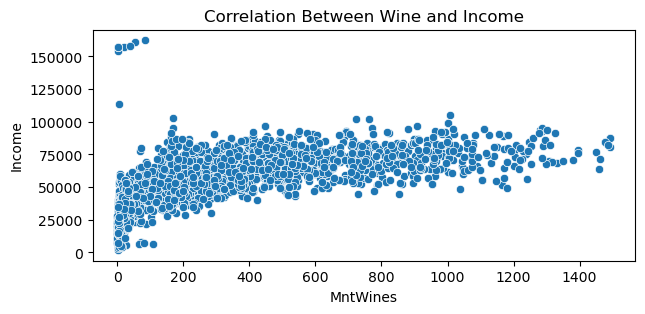

In [134]:
plt.figure(figsize=(7,3))
sns.scatterplot(data = df, x= 'MntWines', y = 'Income')

plt.title('Correlation Between Wine and Income')
plt.show()

In [135]:
df.corr(method='spearman').loc['Income', 'MntWines']

0.8291574634530066

Income dan Wine juga memiliki positive correlation yang kuat sebesar 0.83. Ini menggambarkan bahwa besar nya income yang dimiliki customer, dapat mempengaruhi banyak nya produk wine yang di beli oleh customer. Hal ini dapat menggambarkan strategi perusahaan untuk melakukan approach penjualan wine ke customer berdasarkan income customer tersebut. Semakin besar income customer, maka sebaiknya perusahaan juga dapat memprioritaskan produk ini untuk di jual ke customer tersebut. Strategi Pricing pada produk Wine pun juga dapat di teliti lebih lanjut.

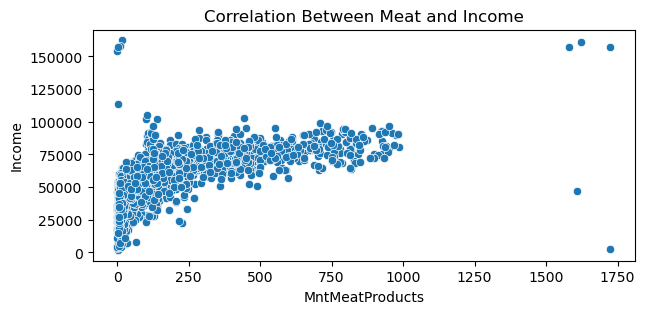

In [136]:
plt.figure(figsize=(7,3))
sns.scatterplot(data = df, x= 'MntMeatProducts', y = 'Income')

plt.title('Correlation Between Meat and Income')
plt.show()

In [137]:
df.corr(method='spearman').loc['Income', 'MntMeatProducts']

0.8139582676445827

Income dan Meat juga memiliki positive correlation yang kuat sebesar 0.81. Ini menggambarkan bahwa besar nya income yang dimiliki customer, dapat mempengaruhi banyak nya produk Meat yang di beli oleh customer. Hal ini dapat menggambarkan strategi perusahaan untuk melakukan approach penjualan Meat ke customer berdasarkan income customer tersebut. Semakin besar income customer, maka sebaiknya perusahaan juga dapat memprioritaskan produk ini untuk di jual ke customer tersebut. Strategi Pricing pada produk Meat pun juga dapat di teliti lebih lanjut.

Ketiga hal di atas menggambarkan bahwa perusahaan sebaiknya memfokuskan strategi pricing yang lebih tinggi dan juga penjualan barang mewah (untuk meat dan wine) kepada orang yang secara relatif income nya lebih tinggi dibandingkan customer lainnya. Income pun akan mempengaruhi banyak nya sekali pembelian dari customer. Sehingga, saran saya pun sebaiknya perusahaan dapat mempertahankan customer-customer dengan income yang tinggi dan cara-cara seperti yang akan dibahas pada segmen selanjutnya.

In [138]:
df.corr(method='spearman').loc['NumWebPurchases', 'NumWebVisitsMonth']

-0.09711049648874549

Ada satu hal lagi yang ingin saya bahas mengenai korelasi yaitu hubungan Web Purchases dengan Web Visits. Terlihat bahwa korelasi nya secara relatif negatif rendah sampai mendekat dengan angka 0. Hal ini sebaiknya dibahas juga karena banyaknya Web Visits perusahaan tidak berefek pada pembelian barang perusahaan. Ini cukup mengkhawatirkan dan perusahaan sebaiknya memperbaiki Web supermarket agar customer lebih tertarik juga untuk melakukan pembelian pada saat itu juga. Banyak hal yang bisa dilakukan seperti UI dan UX web dapat di permudah lagi, atau promosi pada web, atau juga kemudahan pengiriman barang ketika pembelian di Web.

## Enrolled Time

Pertama-tama, kita sebaiknya harus mengenal customer dari supermarket terlebih dahulu. Sehingga, pada segmen ini, kita akan mengambarkan waktu customer supermarket enrolled pada perusahaan ini.

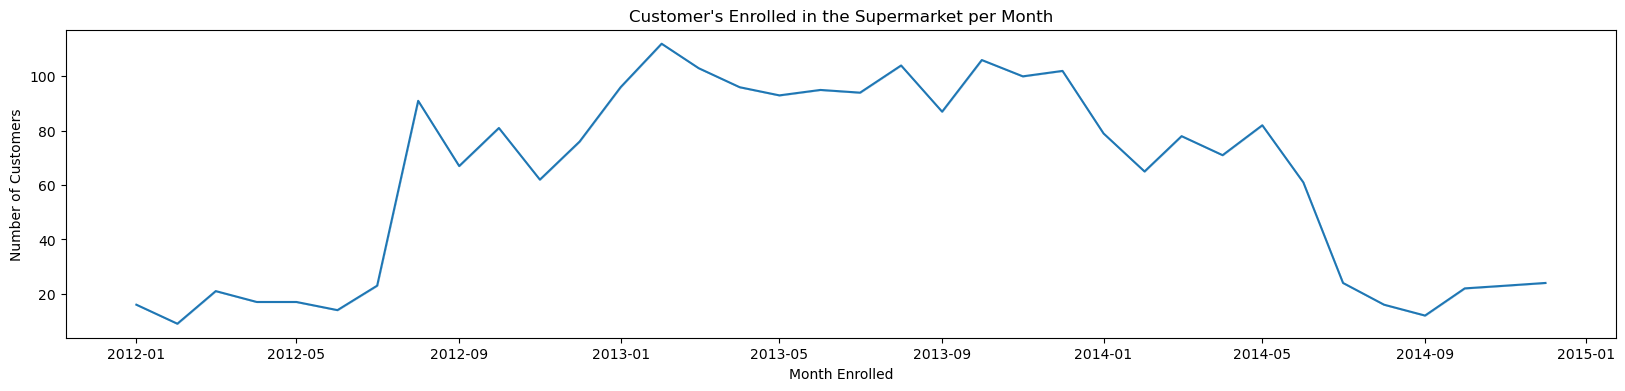

In [139]:
plt.figure(figsize=(20,4))
sns.lineplot(
    data = df, 
    x = 'EnrollMonth',   
    ci = 0,
    estimator=len,
)

plt.xlabel('Month Enrolled')
plt.ylabel('Number of Customers')
plt.title('Customer\'s Enrolled in the Supermarket per Month')
plt.show()

Dapat dilihat di atas bahwa customer yang enrolled pada perusahaan supermarket memiliki peak pada awal tahun 2013. Banyak nya customer's enrolled pada tahun itu pun cukup "steady" sepanjang tahun. Namun, pada awal tahun 2014, enrolled customer's kita turun dan walaupun ada kenaikan pada bulan Mei, kenaikannya terlihat tidak terlalu signifikan. Pada bulan September 2014, enrolled customer's kami pun mengalami penurunan yang jumlah customer enrolled nya pun tidak jauh beda dengan awal tahun 2012 (awal mula perusahaan mendapatkan data). 

Hal ini menggambarkan bahwa kurang nya perusahaan ini untuk engage new customers pada tahun 2014. Diperlukan data strategi marketing, sales, dan hal lainnya yang dapat berefek pada mendapatkan customers baru untuk perusahaan. Perusahaan juga harus mempertahankan semua customers yang sudah dimiliki dan kita juga dapat menganlisa data lainnya untuk menentukan strategi yang cocok.

## Customer's Age

Dapat dilihat pada grafik dibawah umur customer supermarket. Hal ini dapat menggambarkan banyak dan sedikitnya generasi customer kami yang dapat mempengaruhi personality customer yang mampu membantu menentukan strategi penjualan perusahaan kedepannya. 

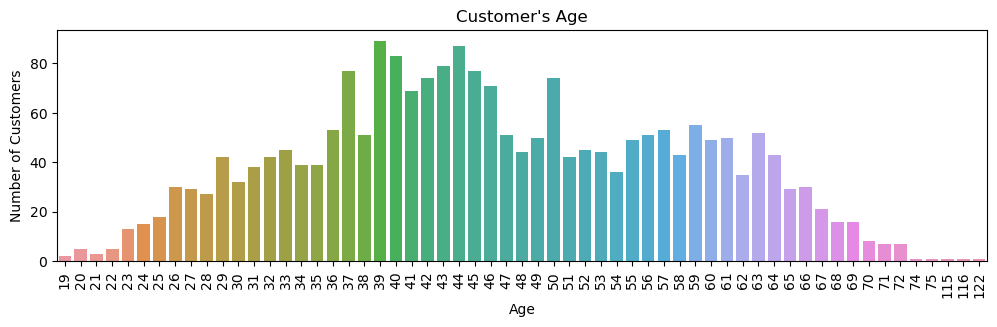

In [140]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='Age')
plt.xticks(rotation= 90)
plt.ylabel('Number of Customers')
plt.title('Customer\'s Age')
plt.show()

Terlihat pada data diatas, perusahaan memiliki customer yang berada pada Generasi X. Karena banyak nya Generasi X, dapat dikatakan bahwa isi household dari customer tersebut akan lebih banyak dibandingkan generasi lainnya (dapat dibuktikan pada grafik dibawah) sehingga akan cenderung membeli barang kebutuhan keluarga. Strategi perusahaan secara garis besar pun dapat cenderung untuk mengarah ke Generasi X (atau bisa juga dengan strategi 'family').

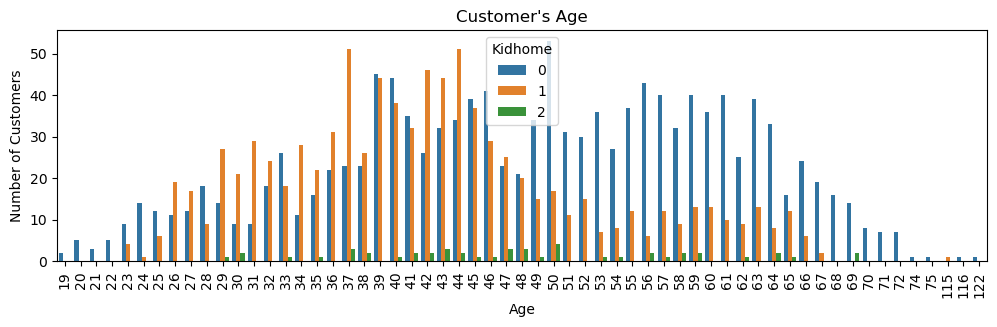

In [141]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='Age', hue='Kidhome')
plt.xticks(rotation= 90)
plt.ylabel('Number of Customers')
plt.title('Customer\'s Age')
plt.show()

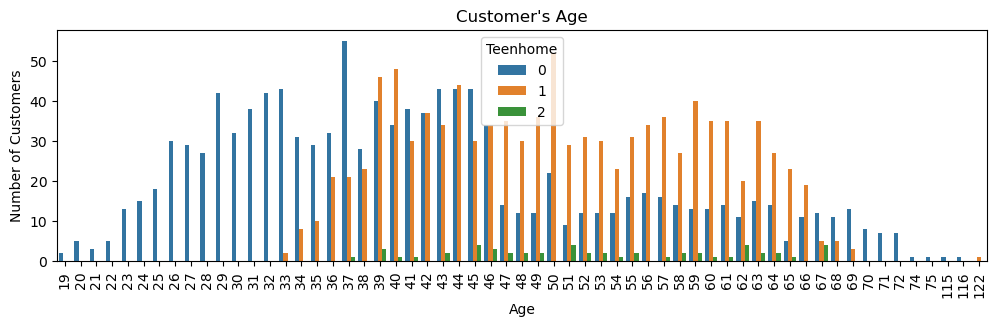

In [142]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x='Age', hue='Teenhome')
plt.xticks(rotation= 90)
plt.ylabel('Number of Customers')
plt.title('Customer\'s Age')
plt.show()

Saat ini, kita ingin mengetahui rata-rata income dari customer yang dimiliki per umur customer. 

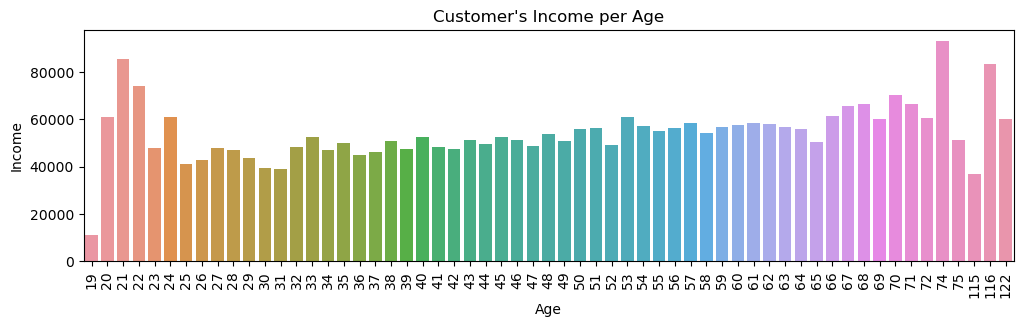

In [143]:
plt.figure(figsize=(12,3))
sns.barplot(data=df, x='Age', y='Income', estimator= np.average, ci=0)
plt.xticks(rotation= 90)
plt.title('Customer\'s Income per Age')
plt.show()

Terlihat bahwa rata-rata income pada tiap umur bersifat fluktuatif. Generasi X pun yang jumlah customernya dapat dikatakan banyak, tidak memiliki income yang terlalu besar. Namun, hal ini belum tentu menggambarkan banyak nya pembelian oleh customer itu sehingga harus kami buktikan terlebih dahulu pada grafik dibawah.

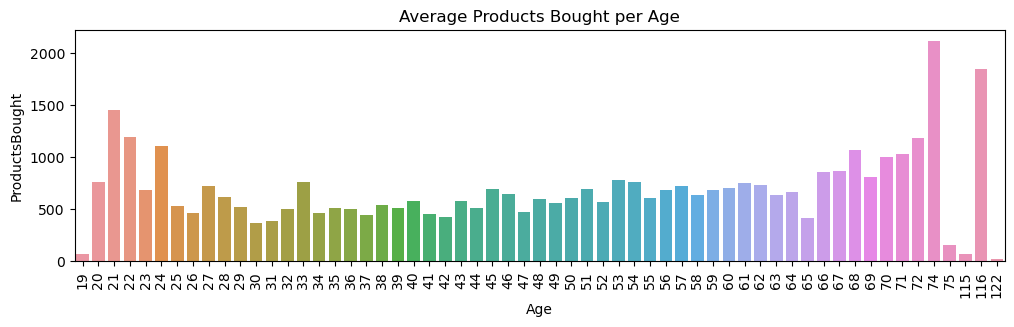

In [144]:
plt.figure(figsize=(12,3))
sns.barplot(data=df, x='Age', y='ProductsBought', estimator = np.average, ci=0)
plt.xticks(rotation= 90)
plt.title('Average Products Bought per Age')
plt.show()

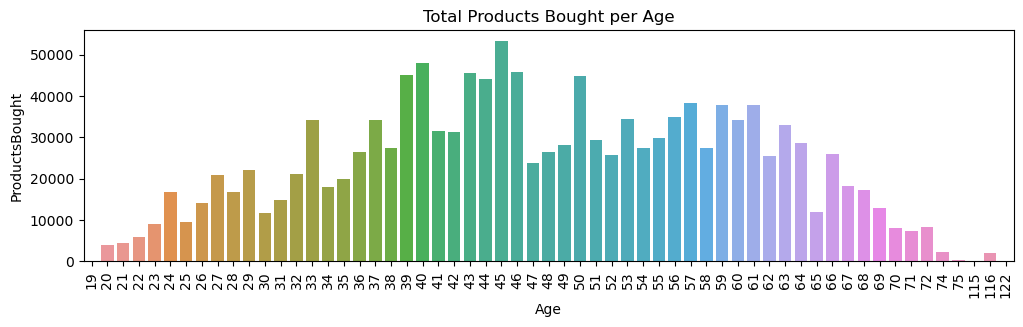

In [145]:
plt.figure(figsize=(12,3))
sns.barplot(data=df, x='Age', y='ProductsBought', estimator = np.sum, ci=0)
plt.xticks(rotation= 90)
plt.title('Total Products Bought per Age')
plt.show()

Terlihat pada 2 grafik diatas, bahwa banyak nya rata2 pembelian dan income menggambarkan grafik barplot yang tidak jauh beda. Walaupun, customer kita cenderung banyak pada Generasi X dan penjualan supermarket lebih banyak pada customer tersebut, rata-rata pembelian generasi tersebut tidak terlalu besar, dan hal ini pun mungkin dapat dipengaruhi banyak nya income customer. Mungkin perusahaan dapat memaksimalkan input ini dengan melakukan direct selling kepada customer yang income nya tergolong besar seperti pada customer berumur 21 dan juga berumur 116 (asumsi dapat di approach secara langsung).

Pengaruh banyak nya income mempengaruhi banyak nya pembelian sudah dibuktikan pada segmen korelasi.

## Recency

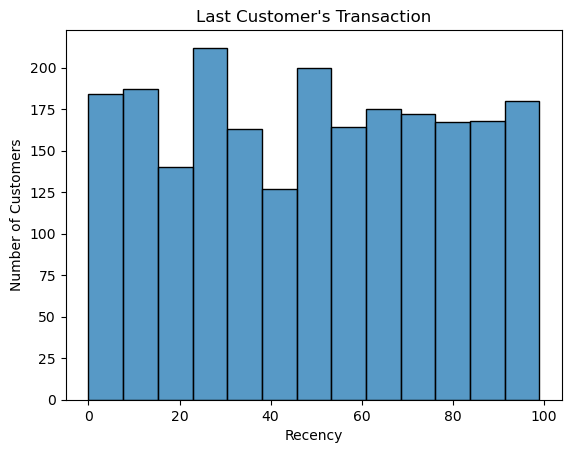

In [194]:
sns.histplot(data= df, x='Recency')
plt.ylabel('Number of Customers')
plt.title('Last Customer\'s Transaction')
plt.show()

In [147]:
df['Recency'].mean()

49.12103617686467

Grafik diatas menggambarkan kapan customer terakhir melakukan transaksi di supermarket kami. Terlihat bahwa rata-rata nya adalah 49 hari atau 1-2 bulan. Dapat di asumsikan bahwa customer cenderung melakukan transaksi untuk melakukan belanja bulanan. Customer yang perlu di teliti lebih lanjut, diasumsikan adalah orang-orang dibawah.

In [148]:
df[df['Recency']>df['Recency'].describe()['75%']]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34,422,2014-01-01
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0,56,1102,2013-11-01
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,66,1782,2013-03-01
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-03-11,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,3,11,0,30,133,2012-03-01
25,7892,1969,Graduation,Single,18589.0,0,0,2013-02-01,89,6,4,25,15,12,13,2,2,1,3,7,0,0,0,0,0,0,3,11,0,46,75,2013-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,6261,1979,Graduation,Married,58025.0,0,1,2013-11-26,81,270,31,88,11,48,22,3,3,2,10,4,0,0,0,0,0,0,3,11,0,36,470,2013-11-01
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,3,11,0,36,653,2013-03-01
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0,31,84,2013-03-01
2233,8372,1974,Graduation,Married,34421.0,1,0,2013-01-07,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,41,30,2013-01-01


Text(0.5, 1.0, 'Potential Loss of Customer')

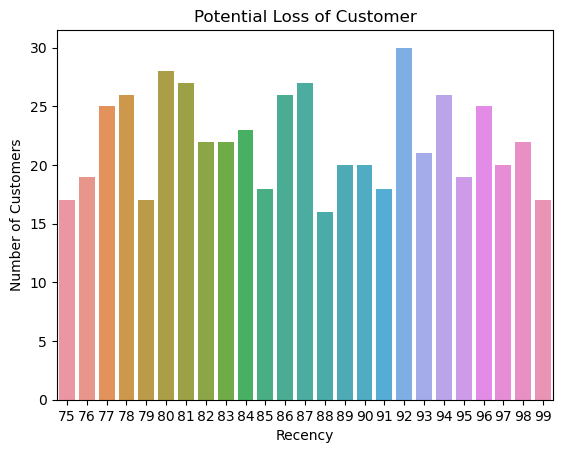

In [149]:
sns.countplot(data=df[df['Recency']>df['Recency'].describe()['75%']], x='Recency')
plt.ylabel('Number of Customers')
plt.title('Potential Loss of Customer')

Terlihat bahwa masih banyak customer yang melakukan pembelian terakhir diatas 75 hari yang lalu. Orang-orang ini harus kami teliti lebih lanjut agar kami tidak kehilangan customer tersebut. Perusahaan mungkin dapat mengontak customer ini satu per satu dan mencoba membuat customer tersebut tertarik membeli barang kami.

## Product Preference

Pada segmen ini, kita hanya ingin melihat produk apa yang paling banyak dibeli oleh customer dan paling sedikit.

In [ ]:
df_products = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2234,709,43,182,42,118,247
2235,406,0,30,0,0,8
2236,908,48,217,32,12,24
2237,428,30,214,80,30,61


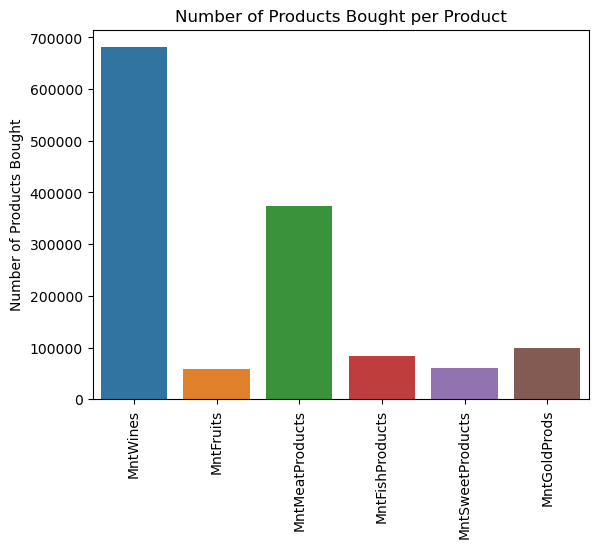

In [188]:
sns.barplot(data = df_products, estimator=np.sum, ci=0)
plt.xticks(rotation=90)
plt.ylabel('Number of Products Bought')
plt.title('Number of Products Bought per Product')
plt.show()

Terlihat pada grafik diatas bahwa wine adalah produk yang paling banyak dan fruit produk paling sedikit. Terlihat bahwa produk yang paling laris adalah wine. Perusahaan juga sebaiknya mempertimbangkan menaikkan harga wine karena sudah memeliki segmen customer yang cukup banyak pada produk ini. Sebaliknya untuk fruits, perusahaan sebaiknya mempertimbangkan untuk menurunkan harga agar dapat menambah penjualan fruits.

## Customer's Education

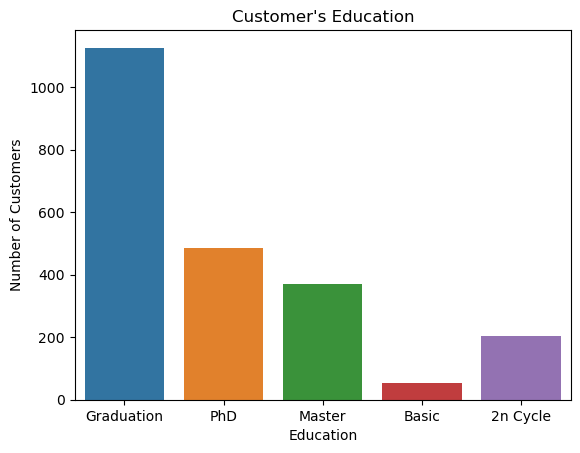

In [150]:
sns.countplot(data=df, x='Education')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.title('Customer\'s Education')
plt.show()

Kita bisa melihat bahwa customer supermarket paling banyak adalah lulusan S1 dan baling dikit adalah 'Basic'. Penjualan yang didapatkan perusahaan pun paling banyak dari lulusan S1 seperti grafik dibawah.

<AxesSubplot:xlabel='Education', ylabel='ProductsBought'>

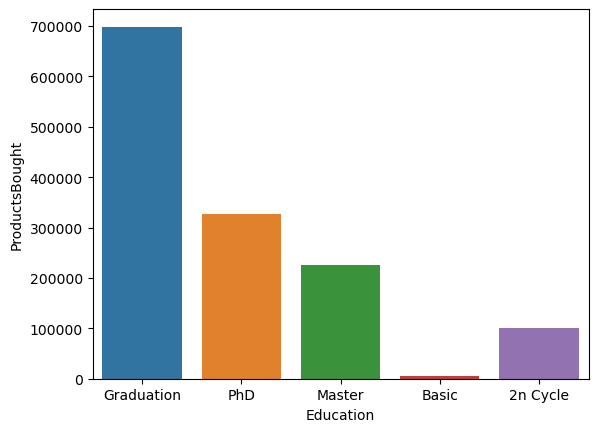

In [151]:
sns.barplot(data=df, x='Education', y='ProductsBought', estimator=np.sum, ci=0)

Walaupun, pembelian yang dibuat oleh customer walaupun paling banyak adalah dari lulusan S1. Grafik dibawah menggambarkan rata-rata pemebelian dari education customer. Terlihat rata-rata pembelian customerlulusan PhD paling banyak dan lulusan masters pun dapat menyaingi lulusan S1. Sehingga, perusahaan juga sebaiknya mentargetkan customer lulusan PhD untuk menjadi 'loyal customer' karena banyak nya pembelian yang dilakukannya. Namun, sebaiknya lulusan S1 dan Masters tidak di sampingkan karena tetap melakukan pembelian yang relatif cukup banyak dan jumlah lulusan customer S1 yang banyak.

<AxesSubplot:xlabel='Education', ylabel='ProductsBought'>

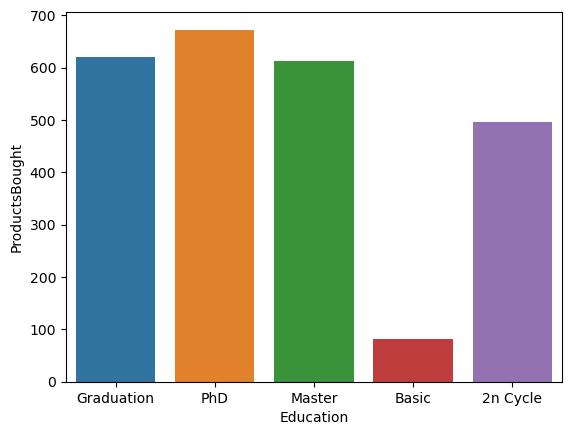

In [152]:
sns.barplot(data=df, x='Education', y='ProductsBought', estimator=np.average, ci=0)

Hal atas dapat terjadi karena rata-rata income yang di dapatkan tiap customer's education yang berbeda seperti yang digambarkan pada grafik dibawah.

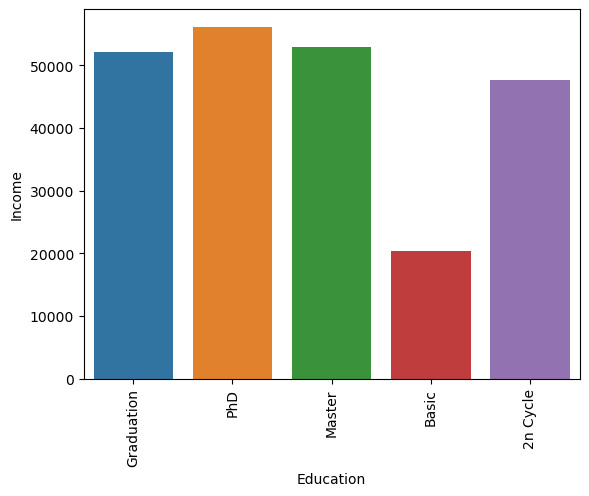

In [153]:
sns.barplot(data = df, x= 'Education', y= 'Income', estimator=np.average, ci=0)
plt.xticks(rotation=90)
plt.show()

## Marital Status

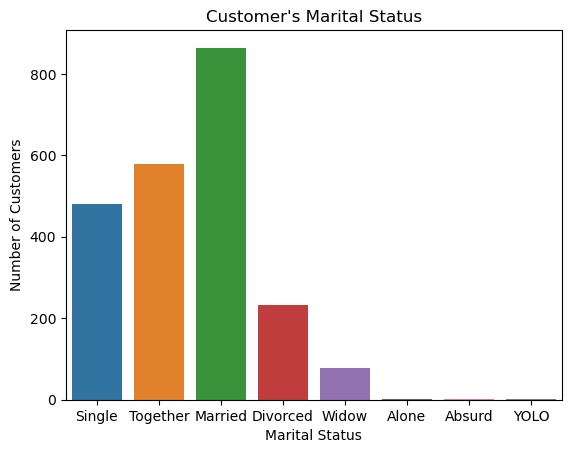

In [155]:
sns.countplot(data=df, x='Marital_Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Customer\'s Marital Status')
plt.show()

Kita bisa melihat bahwa customer supermarket paling banyak adalah customer yang sudah menikah dan paling sedikit adalah 'Alone', 'Absurd', dan 'YOLO'. Penjualan yang didapatkan perusahaan pun paling banyak dari yang sudah married seperti grafik dibawah.

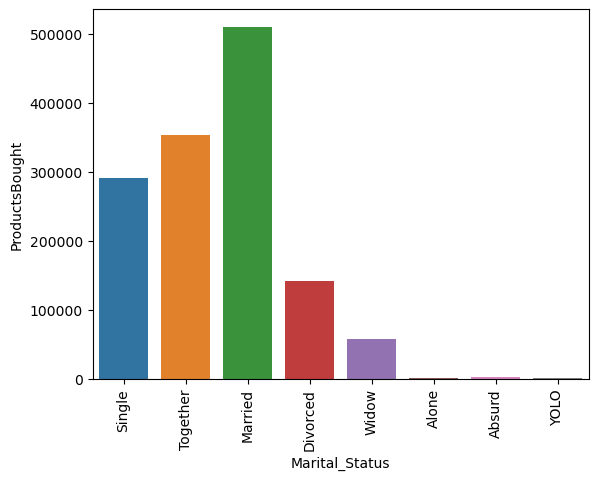

In [185]:
sns.barplot(data = df, x= 'Marital_Status', y= 'ProductsBought', estimator=np.sum, ci=0)
plt.xticks(rotation=90)
plt.show()

Namun, untuk rata-rata pembelian per segemen marital status, status absurd paling besar yang dapat dilihat pada grafik dibawah. Hal ini juga mungkin dikarenakannya dikit nya data 'Absurd' pada dataset sehingga menggambarkan pembelian produk yang banyak. Namun, grafik dibawah bisa menggambarkan bahwa perusahaan dapat memfokuskan direct selling pada produk yang relatif cukup mahal (Segemen absurd juga memiliki income yang relatif besar, terlihat pada grafik dibawah) dan mempertahankan 2 customer yang terkategorikan 'Absurd'. Dua customer tersebut ada pada data dibawah.

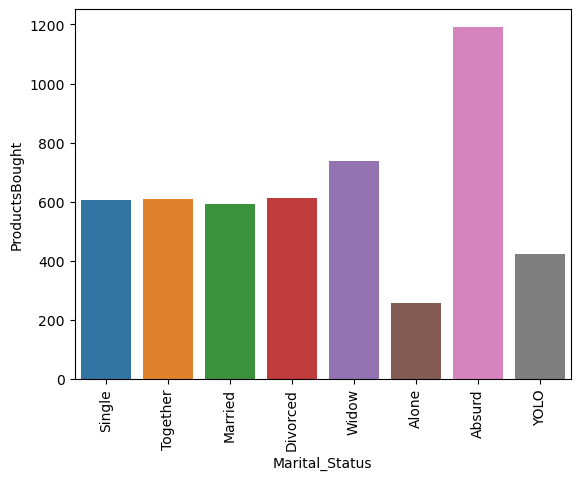

In [156]:
sns.barplot(data = df, x= 'Marital_Status', y= 'ProductsBought', estimator=np.average, ci=0)
plt.xticks(rotation=90)
plt.show()

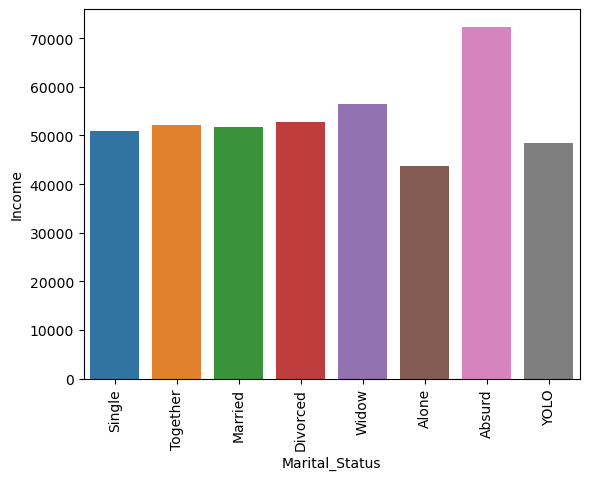

In [158]:
sns.barplot(data = df, x= 'Marital_Status', y= 'Income', estimator=np.average, ci=0)
plt.xticks(rotation=90)
plt.show()

In [183]:
df[df['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,22,1216,2012-12-01
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-10-01,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,58,1169,2014-10-01


## Place Preference

Pada segmen ini, kita ingin melihat preferensi tempat customer melakukan pembelian barang supermarket. Sebelumnya, kita harus melihat terlebih dahuliu total pembelian di tiap channel pembelian supermarket.

In [159]:
df_purchases = df[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']]

In [160]:
df_purchases['SumWeb'] = df_purchases['NumWebPurchases'].sum()
df_purchases['SumCatalog'] = df_purchases['NumCatalogPurchases'].sum()
df_purchases['SumStore'] = df_purchases['NumStorePurchases'].sum()
df_purchases_sum = df_purchases[['SumStore', 'SumCatalog', 'SumWeb']]
df_purchases_sum

,SumStore,SumCatalog,SumWeb
0,12967,5962,9147
1,12967,5962,9147
2,12967,5962,9147
3,12967,5962,9147
4,12967,5962,9147
...,...,...,...
2234,12967,5962,9147
2235,12967,5962,9147
2236,12967,5962,9147
2237,12967,5962,9147


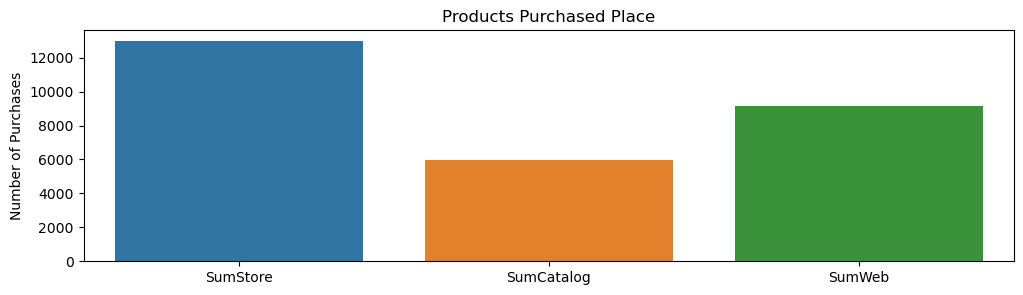

In [161]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_purchases_sum)
plt.ylabel('Number of Purchases')
plt.title('Products Purchased Place')
plt.show()


Terlihat pada grafik di atas bahwa pembelian di Store menghasilkan angka purchase yang paling banyak dan Catalog yang paling sedikit. Dari grafik ini, perusahaan dapat memperbaiki lagi kualitas jual pada Katalog nya dan tetap mempertahankan penjualan di channel lainnya. Khususnya apabila cost yang di keluarkan untuk katalog relatif kecil (Perlu data lainnya seperti cost yang dikeluarkan untuk memastikan ini). 

## Campaign and Discount Success

Pada segmen ini, kami ingin melihat kesuksesan tiap campaign yang dilakukan supermarket. Dalam hal ini, kita bisa melihat jumlah accepted offer tiap campaign nya.

In [162]:
df_campaign = df[(df['AcceptedCmp1']==1) | (df['AcceptedCmp2']==1) | (df['AcceptedCmp3']==1) | (df['AcceptedCmp4']==1) | (df['AcceptedCmp5']==1)][['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

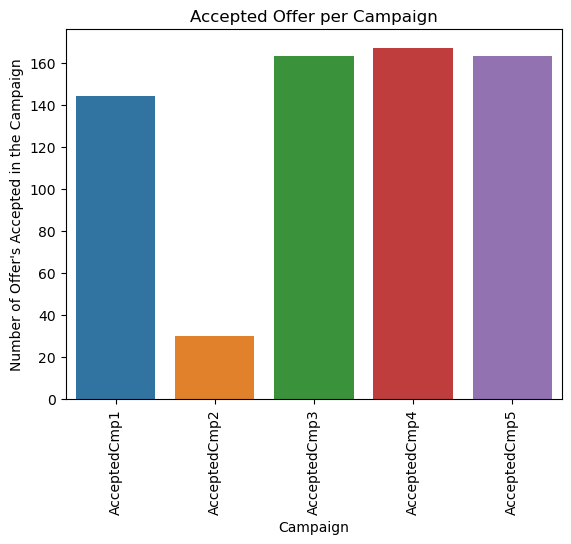

In [163]:
sns.barplot(data = df_campaign, estimator=np.sum, ci=0)
plt.xticks(rotation=90)
plt.xlabel('Campaign')
plt.ylabel('Number of Offer\'s Accepted in the Campaign')
plt.title('Accepted Offer per Campaign')
plt.show()

Terlihat di atas bahwa campaign yang paling berhasil adalah campaign 4 dan yang paling tidak berhasil adalah campaign 2. Campaign lainnya pun dapat tergolong cukup sukses karena angka yang tidak jauh beda dengan campaign 4. Dari grafik ini, perusahaan dapat memfokuskan strategi campaign selanjutnya dengan banyak mengimitasi campaign 4 dan harus diferensiasikannya dengan campaign 2. Kami juga harus menganalisa lebih lanjut mengenai cost yang di keluarkan untuk dapat melihat keuntungannya secara keuangan. 

In [164]:
df[df['NumDealsPurchases']>df['NumDealsPurchases'].describe()['75%']].sort_values('NumDealsPurchases', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,24,178,2012-09-01
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,47,181,149,95,95,15,9,6,9,7,0,0,0,0,0,0,3,11,0,48,1082,2013-01-01
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,42,1608,2014-01-01
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,33,1717,2012-04-01
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,44,8,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0,40,120,2012-08-01
1530,6050,1975,2n Cycle,Married,57036.0,0,1,2012-11-12,33,1171,43,219,19,14,47,4,6,3,13,9,1,0,0,0,0,0,3,11,0,40,1513,2012-11-01
1532,3463,1975,PhD,Married,69283.0,0,1,2014-06-14,41,674,62,134,0,26,8,4,7,3,13,5,0,0,0,0,0,0,3,11,0,40,904,2014-06-01
1533,2804,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,1,40,120,2012-08-01


<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

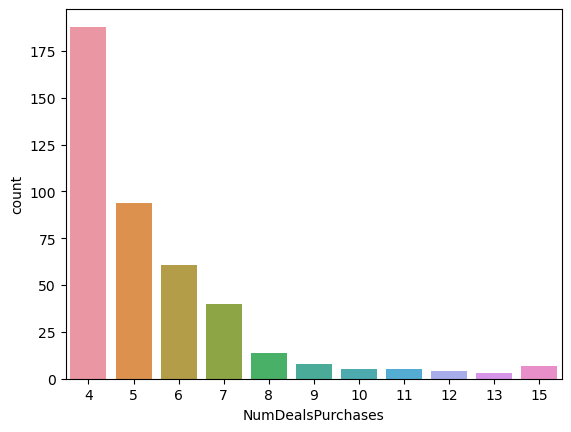

In [165]:
sns.countplot(data=df[df['NumDealsPurchases']>df['NumDealsPurchases'].describe()['75%']], x='NumDealsPurchases')

Selain campaign, kita juga bisa melihat customer-customer yang cenderung suka membeli barang dengan diskon-diskon yang di tawarkan perusahaan. Data diatas menggambarkan 25% customer yang paling cenderung mengambil diskon (perlu data lebih detail mengenai berapa diskon yang ditawarkan). Walaupun customer tersebut cenderung mengambil diskon, masih banyak customer membeli barang perusahaan relatif sedikit khususnya hanya 4 barang - 6 barang. 

Namun, dari data dibawah, kita bisa melihat customer yang cenderung langsung membeli banyak barang (lebih dari 11 barang) ketika ada diskon. Perusahaan dapat memaksimalkan data ini dengan memberikan diskon khusus pada customer-customer tersebut. Perusahaan pun juga dapat melakukan discount manipulation yang baik agar customer khusus ini dapat tertarik melakukan pembelian yang banyak lagi.

In [186]:
df[df['NumDealsPurchases']>11].sort_values('NumDealsPurchases', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
21,5376,1979,Graduation,Married,2447.0,1,0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,36,1730,2013-06-01
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0,42,1608,2014-01-01
432,238,1967,2n Cycle,Together,67309.0,1,1,2013-01-23,76,515,47,181,149,95,95,15,9,6,9,7,0,0,0,0,0,0,3,11,0,48,1082,2013-01-01
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0,33,1717,2012-04-01
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,3,11,0,24,178,2012-09-01
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,44,8,2014-05-01
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,52,9,2014-06-01
287,8148,1956,Master,Together,50898.0,1,1,2013-08-01,88,285,28,242,55,114,135,13,6,2,12,5,0,0,0,0,0,0,3,11,0,59,859,2013-08-01
1503,3594,1973,Master,Married,54108.0,1,1,2012-05-11,74,539,6,91,8,6,97,13,8,2,9,8,0,0,0,0,0,0,3,11,0,42,747,2012-05-01
1788,1513,1979,2n Cycle,Together,60839.0,1,1,2012-08-28,72,600,21,128,223,150,128,13,2,2,12,8,0,0,0,0,0,0,3,11,0,36,1250,2012-08-01


## Complain

Pada segmen ini, akan di analisa alasan potensial mengapa terjadinya complain tersebut.

In [166]:
df_complain = df[df['Complain']==1]
df_complain

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ProductsBought,EnrollMonth
78,10401,1976,2n Cycle,Together,26326.0,0,0,2013-04-09,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,3,11,0,39,18,2013-04-01
147,3120,1981,Graduation,Together,38547.0,1,0,2013-08-28,49,6,1,10,0,1,4,1,1,0,2,8,0,0,0,0,0,1,3,11,0,34,22,2013-08-01
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,115,65,2013-09-01
271,5726,1983,Master,Single,31788.0,1,0,2014-03-20,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,1,3,11,0,32,60,2014-03-01
355,6201,1978,Graduation,Single,38643.0,1,1,2013-11-29,45,22,2,14,0,1,10,2,2,0,3,7,0,0,0,0,0,1,3,11,0,37,49,2013-11-01
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,3,11,0,72,900,2013-08-01
590,3710,1984,PhD,Single,39684.0,1,0,2012-12-10,41,19,0,35,6,4,17,2,2,1,2,7,0,0,0,0,0,1,3,11,1,31,81,2012-12-01
972,10995,1988,2n Cycle,Married,15716.0,1,0,2012-12-11,8,16,5,30,8,7,26,3,3,0,4,8,0,0,0,0,0,1,3,11,0,27,92,2012-12-01
1041,6730,1954,Graduation,Married,38998.0,1,1,2012-03-11,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,3,11,0,61,54,2012-03-01
1069,2875,1978,Graduation,Married,67023.0,0,0,2014-04-03,93,444,44,382,11,8,17,1,3,7,13,2,0,0,0,0,0,1,3,11,0,37,906,2014-04-01


In [167]:
df_complain_purchases = df_complain[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']]
df_complain_purchases

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
78,0,0,3,3
147,1,0,2,8
192,2,1,2,5
271,3,0,4,5
355,2,0,3,7
358,5,3,5,2
590,2,1,2,7
972,3,0,4,8
1041,2,0,3,8
1069,3,7,13,2


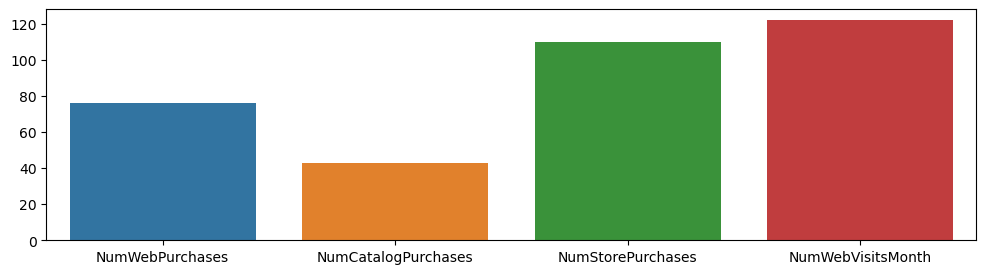

In [168]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_complain_purchases, estimator=np.sum, ci=0)
plt.show()

Pertama, kita melihat tempat pembelian dari customer yang melakukan complain agar kita dapat mengurangi ketidaknyamanan customer pada channel tersebut. Terlihat bahwa channel yang paling banyak menghasilkan complain adalah di Store supermarket. Perusahaan dapat menyelediki lebih lanjut mengenai efisiensi dan kenyamanan pembelian di store. 

Ada juga informasi tambahan yaitu umumnya, customer yang melakukan complain banyak yang melakukan Web visit. Sehingga, dapat diasumsikan juga bahwa informasi yang diberikan pada web kami tidak sesuai dengan apa yang di tawarkan perusahaan kepada customernya. Perusahaan sebaiknya dapat mengevaluasi kembali apa yang di jelaskan pada web supermarket. 

In [169]:
df_complain_products = df_complain[['MntWines', 'MntMeatProducts','MntFruits', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [172]:
df_complain_products

,MntWines,MntMeatProducts,MntFruits,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
78,1,5,0,0,0,3,9
147,6,10,1,1,0,1,4
192,15,8,6,6,7,4,25
271,16,23,7,7,0,8,6
355,22,14,2,2,0,1,10
358,629,177,17,17,69,0,8
590,19,35,0,0,6,4,17
972,16,30,5,5,8,7,26
1041,34,14,1,1,0,0,5
1069,444,382,44,44,11,8,17


Text(0, 0.5, 'Total Purchased')

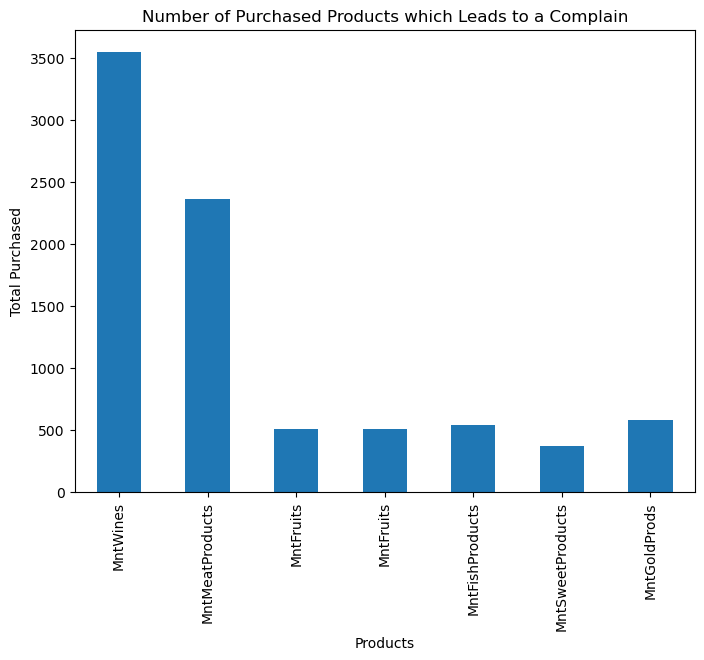

In [182]:
ax = df_complain_products.sum().plot(kind='bar', figsize=(8, 6))

ax.set_title('Number of Purchased Products which Leads to a Complain')
ax.set_xlabel('Products')
ax.set_ylabel('Total Purchased')

Selain tempat, kita juga bisa melihat produk apa yang di beli oleh customer yang melakukan complain. Terlihat bahwa complain paling banyak jatuh pada produk wine. Hal ini mungkin dapat diakibatkan banyak nya produk wine yang di beli oleh customer (di gambarkan pada segmen product preference). Namun, perusahaan tetap harus mengevaluasi kembali mengapa banyak customer yang membeli wine melakukan complain pada perusahaan. 

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang karakteristik customer yang dapat di fokuskan untuk memaksimalkan penjualan perusahaan:

* Besar nya income yang dimiliki customer, dapat mempengaruhi banyak nya produk yang di beli oleh customer khususnya Daging dan Wine.
* Perusahaan memiliki customer yang banyak yang berada pada Generasi X. Namun, rata-rata pembelian generasi tersebut tidak terlalu besar, dan hal ini pun mungkin dapat dipengaruhi banyak nya income customer.
* Terlihat bahwa masih banyak customer yang melakukan pembelian terakhir diatas 75 hari yang lalu. Orang-orang ini perlu di teliti lebih lanjut agar kami tidak kehilangan customer tersebut.
* Wine adalah produk yang paling banyak diminati dan fruit produk paling sedikit.
* Walaupun, pembelian yang dibuat oleh customer walaupun paling banyak adalah dari lulusan S1, rata-rata pembelian customer lulusan PhD paling banyak dan lulusan masters pun dapat menyaingi rata-rata pembelian lulusan S1.
* Marital status absurd memiliki rata-rata pembelian paling besar. Hal ini juga mungkin dikarenakannya dikit nya data 'Absurd' pada dataset sehingga menggambarkan pembelian produk yang banyak. Namun, ini tetap dapat di maksimalkan.
* Pembelian di Store menghasilkan angka purchase yang paling banyak dan Catalog yang paling sedikit.


Selain itu, kita bisa membuat kesimpulan berikut tetang strategi perusahaan saat ini agar di maksimalkan untuk mendapatkan customer baru atau memaksimalkan penjualan perusahaan:
* Pada bulan September 2014, enrolled customer's kami pun mengalami penurunan yang jumlah customer enrolled nya pun tidak jauh beda dengan awal tahun 2012 (awal mula perusahaan mendapatkan data). Hal ini menggambarkan bahwa kurang nya perusahaan ini untuk engage new customers pada tahun 2014.
* Campaign yang paling berhasil adalah campaign 4 dan yang paling tidak berhasil adalah campaign 2
* Adanya customer yang cenderung langsung membeli banyak barang (lebih dari 11 barang) ketika ada diskon.



**Rekomendasi**

* Ketiga hal di atas menggambarkan bahwa perusahaan sebaiknya memfokuskan strategi pricing yang lebih tinggi dan juga penjualan barang mewah (untuk meat dan wine) kepada orang yang secara relatif income nya lebih tinggi dibandingkan customer lainnya. Income pun akan mempengaruhi banyak nya sekali pembelian dari customer. Sehingga, saran saya pun sebaiknya perusahaan dapat mempertahankan customer-customer dengan income yang tinggi.
* Diperlukan data strategi marketing, sales, dan hal lainnya yang baru yang dapat berefek pada mendapatkan customers baru untuk perusahaan karena adanya penurunan new customers.
* Mungkin perusahaan dapat memaksimalkan input ini dengan melakukan direct selling kepada customer yang income nya tergolong besar seperti pada customer berumur 21 dan juga berumur 116 (asumsi dapat di approach secara langsung).
* Perusahaan mungkin dapat mengontak customer ini satu per satu dan mencoba membuat customer tersebut tertarik membeli barang kami.
* Perusahaan juga sebaiknya mempertimbangkan menaikkan harga wine karena sudah memeliki segmen customer yang cukup banyak pada produk ini. Sebaliknya untuk fruits, perusahaan sebaiknya mempertimbangkan untuk menurunkan harga agar dapat menambah penjualan fruits.
* Perusahaan juga sebaiknya mentargetkan customer lulusan PhD untuk menjadi 'loyal customer' karena banyak nya pembelian yang dilakukannya. Namun, sebaiknya lulusan S1 dan Masters tidak di sampingkan karena tetap melakukan pembelian yang relatif cukup banyak dan jumlah lulusan customer S1 yang banyak.
* Perusahaan dapat memfokuskan direct selling pada produk yang relatif cukup mahal (Segemen absurd juga memiliki income yang relatif besar, terlihat pada grafik dibawah) dan mempertahankan 2 customer yang terkategorikan 'Absurd'
* Perusahaan dapat memperbaiki lagi kualitas jual pada Katalog nya dan tetap mempertahankan penjualan di channel lainnya
* Perusahaan dapat memfokuskan strategi campaign selanjutnya dengan banyak mengimitasi campaign 4 dan harus diferensiasikannya dengan campaign 2
* Perusahaan dapat memaksimalkan data ini dengan memberikan diskon khusus pada customer-customer tersebut. 

Diharapkan analisis ini bisa membantu perusahaan untuk menentukan strategi yang tepat untuk approach pada tiap segmen customer.